In [56]:
import matplotlib.pyplot as plt
#import folium
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Read Data

In [57]:
df =  pd.read_csv("webofknowledge.csv")
df.head(3)
df[['CR (Cited References)' ,'NR (Cited Reference Count)']].head(3)

,CR (Cited References),NR (Cited Reference Count)
0,"Antonakakis Manos, 2017, P 26 USENIX C SEC S|B...",8
1,"Amess David, 2018, PUNJABI COMMUNITY|Borthwick...",29
2,"Abbasi A, 2005, IEEE INTELL SYST, V20, P67, DO...",48


In [11]:
df.columns

Index(['Unnamed: 0', 'VR (Version Number)', 'PT (Publication Type)',
       'AU (Authors)', 'AF (Author Full Name)', 'TI (Document Title)',
       'SO (Publication Name)', 'LA (Language)', 'DT (Document Type)',
       'DE (Author Keywords)', 'AB (Abstract)', 'C1 (Author Address)',
       'RP (Reprint Address)', 'EM (E-mail Address)', 'CR (Cited References)',
       'NR (Cited Reference Count)', 'TC (Times Cited)', 'Z9', 'U1', 'U2',
       'PU (Publisher)', 'PI (Publisher City)', 'PA (Publisher Address)',
       'SN (ISSN)', 'EI', 'J9 (29-Character Source Abbreviation)',
       'JI (ISO Source Abbreviation)', 'PD (Publication Date)',
       'PY (Year Published)', 'VL (Volume)', 'IS (Issue)',
       'BP (Beginning Page)', 'EP (Beginning Page)',
       'DI (Digital Object Identifier (DOI))', 'PG (Page Count)', 'WC',
       'SC (Subject Category)', 'GA (Document Delivery Number)',
       'UT (Unique Article Identifier)', 'DA', 'Unnamed: 39',
       'AR (Article Number)', 'ID (Keywords Plus

# Word Clouds

### Title

In [9]:
titles = df['TI (Document Title)'].values
titles = str(titles)
#type(titles)
#print(titles[0:100])

['Using Application Layer Banner Data to Automatically Identify IoT Devices'
 'Named Entity Recognit


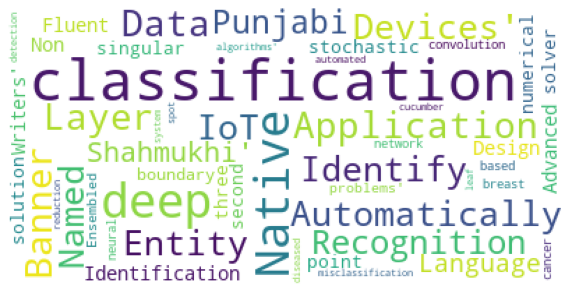

In [318]:
stopwords = set(STOPWORDS)
stopwords.update(["using", "value", "order","shahmukhi '"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",prefer_horizontal =0.5,max_words=50).generate(titles)

# Display the generated image:
# the matplotlib way:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(10)
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis("off")
plt.show()

### Abstract

In [319]:
abstract = df['AB (Abstract)'].values
abstract = str(abstract)

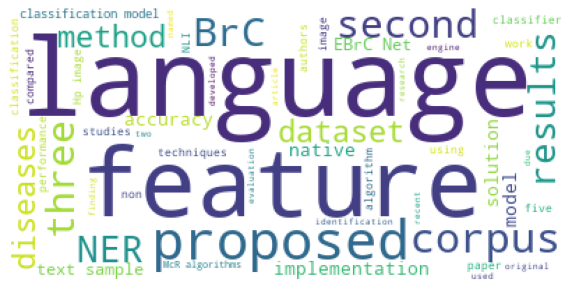

In [321]:
stopwords = set(STOPWORDS)
stopwords.update(["based", "local", "technique","shahmukhi"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",prefer_horizontal =0.5,max_words=50).generate(abstract)

# Display the generated image:
# the matplotlib way:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(10)
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis("off")
plt.show()

### Keywords

In [323]:
abstract = df['DE (Author Keywords)'].values
abstract = str(abstract)

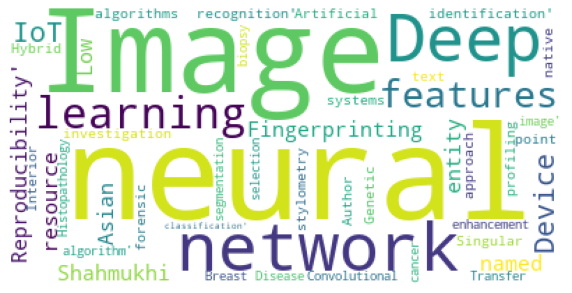

In [330]:
stopwords = set(STOPWORDS)
stopwords.update(["language", "languages", "feature","punjabi",'classification'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",prefer_horizontal =0.5,max_words=50).generate(abstract)

# Display the generated image:
# the matplotlib way:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(10)
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis("off")
plt.show()

# Citation Distribution Plot

In [58]:
citations = df.copy()
citations.shape
citations['bins'] = [ '0' if c == 0 else '1-10' if c<=10 else '11-30' if (c >10 and c<=30) else '31-50' if (c>30 and c<=50) else '>50' for c in citations['TC (Times Cited)']]

[Text(0.5, 0, 'Citation Count'), Text(0, 0.5, 'Number of Articles')]

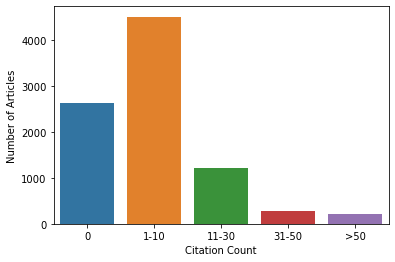

In [60]:
order = ["0", "1-10", "11-30", "31-50", ">50"]
ax = sns.countplot(x = "bins", data = citations, order = order)
ax.set(xlabel="Citation Count", ylabel = "Number of Publications")

# Average Citation Per Year

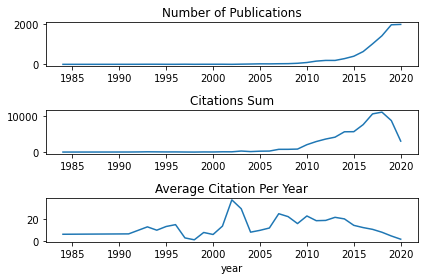

In [84]:
average_citation = df.drop(df.loc[df['PY (Year Published)']==2021].index)
citations_sum = average_citation.groupby('PY (Year Published)')['TC (Times Cited)'].sum()
Number_of_publications = average_citation.groupby('PY (Year Published)').size()

x = citations_sum.index
y1 = Number_of_publications.values
y2 = citations_sum.values
y3 = citations_sum.values/Number_of_publications.values


fig, ax = plt.subplots(3, 1)

ax[0].plot(x,y1)
ax[1].plot(x,y2)
ax[2].plot(x,y3)


ax[0].set_title("Number of Publications")
ax[1].set_title("Citations Sum")
ax[2].set_title("Average Citation Per Year")
ax[2].set_xlabel('year')
fig.tight_layout()
plt.show()

# Scientific production 

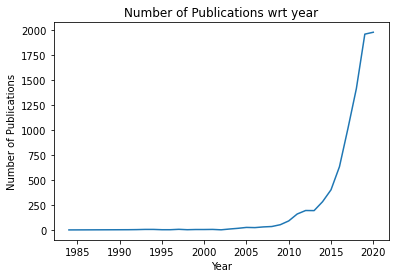

In [85]:
production = df.drop(df.loc[df['PY (Year Published)']==2021].index)
Number_of_publications = average_citation.groupby('PY (Year Published)').size()

x = citations_sum.index
y = Number_of_publications.values



plt.plot(x,y)
plt.title("Number of Publications wrt year")
plt.xlabel('Year')
plt.ylabel('Number of Publications')

fig.tight_layout()
plt.show()

# Page count

In [105]:
pages = df.copy()
pages['bins'] = ['0-5' if (c>=0 and c<=5) else '6-10' if (c> 5 and c<=10) else '11-15' if (c >10 and c<=15) else '16-20' if (c>15 and c<=20) else '21-30' if (c>20 and c<=30) else '>30' for c in pages['PG (Page Count)']]

[Text(0.5, 0, 'pages'), Text(0, 0.5, 'Number of Publications')]

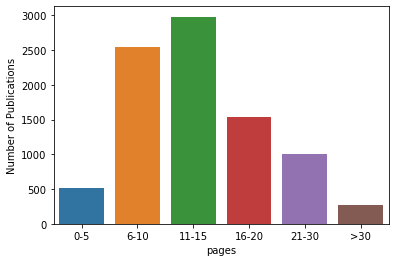

In [111]:
order = ["0-5", "6-10", "11-15", "16-20", "21-30",">30"]
ax = sns.countplot(x = "bins", data = pages, order = order)
ax.set(xlabel="pages", ylabel = "Number of Publications")

# Colaboration

In [268]:
Addr = df['C1 (Author Address)'].values

Data_f = {'country': [], 'city':[], 'university':[]}
for i, addr in enumerate(df['C1 (Author Address)'].values):
    #print(addr)
    #print(i)
    if (type(addr)==str):
        split_addr = addr.split("]")
        if len(split_addr) ==1:
            split_addr= split_addr
        else:
            split_addr= split_addr[1]
        split_addr = str(split_addr).split('.')[0]
        #print(split_addr)
        split_addr = str(split_addr).split(',')
        #print(split_addr)
        uni = split_addr[0]
        country = split_addr[-1]#.split()[-1]
        if  country.split()[-1] == 'USA':
            country = 'USA'
        else:
            pass
        if country[0] == ' ':
            country = country[1:]
        city= split_addr[-2].split()[0]
        Data_f['country'].append(country.upper())
        Data_f['city'].append(city.upper())
        Data_f['university'].append(uni.upper())

In [284]:
Data_first_author= pd.DataFrame.from_dict(Data_f)
count = Data_first_author.groupby('country')['city'].count()
data_count = {'country':count.index,
        'count': count.values
        }

df_count = pd.DataFrame(data_count, columns=['country','count'])
df_count.sort_values(by=['count'], inplace=True,ascending=False)

df2 = df_count[df_count['count'] >= 10]
df2 = df2[df2['country'] != 'PAKISTAN']
df2['count'].unique()

array([859, 316, 230, 202, 128, 107,  53,  43,  40,  36,  35,  28,  25,
        22,  17,  16,  15,  14,  13,  12,  10], dtype=int64)

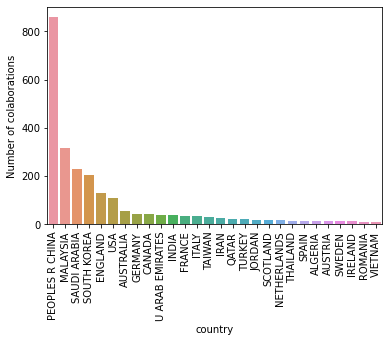

In [288]:
ax = sns.barplot(x = "country",y='count', data = df2)
ax.set(xlabel="country", ylabel = "Number of colaborations")
ax.tick_params(axis='x', rotation=90)

# University 

In [290]:
Addr = df['C1 (Author Address)'].values

Data_f = {'country': [], 'city':[], 'university':[]}
for i, addr in enumerate(df['C1 (Author Address)'].values):
    #print(addr)
    #print(i)
    if (type(addr)==str):
        split_addr = addr.split("]")
        if len(split_addr) ==1:
            split_addr= split_addr
        else:
            split_addr= split_addr[1]
        split_addr = str(split_addr).split('.')[0]
        #print(split_addr)
        split_addr = str(split_addr).split(',')
        #print(split_addr)
        uni = split_addr[0]
        country = split_addr[-1]#.split()[-1]
        if  country.split()[-1] == 'USA':
            country = 'USA'
        else:
            pass
        if country[0] == ' ':
            country = country[1:]
        city= split_addr[-2].split()[0]
        Data_f['country'].append(country.upper())
        Data_f['city'].append(city.upper())
        Data_f['university'].append(uni.upper())

In [301]:
Data_first_author= pd.DataFrame.from_dict(Data_f)
df_uni = Data_first_author[Data_first_author['country'] == 'PAKISTAN']
count = df_uni.groupby('university')['city'].count()
data_count = {'university':count.index,
        'count': count.values
        }

df_count = pd.DataFrame(data_count, columns=['university','count'])
df_count.sort_values(by=['count'], inplace=True,ascending=False)
df2 = df_count[df_count['count'] >= 100]
df2['count'].unique()

array([483, 383, 312, 263, 214, 184, 162, 144, 135, 110, 105, 103],
      dtype=int64)

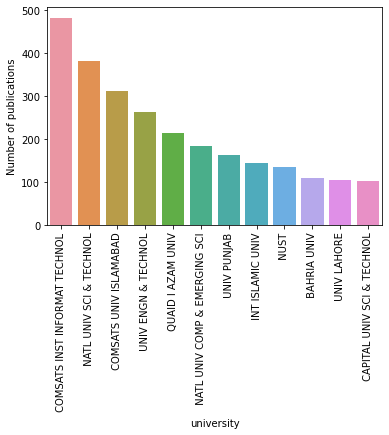

In [302]:
ax = sns.barplot(x ="university", y='count', data = df2)
ax.set(xlabel="university", ylabel = "Number of publications")
ax.tick_params(axis='x', rotation=90)

# Top 10

### Top 10 funding 

In [363]:
agencies = df['FU (Funding Agency and Grant Number)'].values

text_agencies = []
for a in agencies:
    if type(a)==str:
        #print(a)
        text = a.split(';')
        for i in range(len(text)):
            text_agencies.append(text[i])

print(text_agencies[10])
# agencies = str(agencies).split(';')
unique_values = set(text_agencies)
print(len(unique_values))
data_agency = {}

for a in unique_values:
    count = text_agencies.count(a)
    data_agency[a] = count
        
#print(data_agency)
sorted_data = {k: v for k, v in sorted(data_agency.items(), key=lambda item: item[1], reverse=True)}
print(sorted_data)
# print(sorted_data)
# df_count.sort_values(by=['count'], inplace=True,ascending=False)
# df2 = df_count[df_count['count'] >= 100]
# df2['count'].unique()
# Data_f = {'agency': [], 'city':[], 'university':[]}
# for i, addr in enumerate(df['C1 (Author Address)'].values):
#     #print(addr)
#     #print(i)
#     if (type(addr)==str):
#         split_addr = addr.split("]")
#         if len(split_addr) ==1:
#             split_addr= split_addr
#         else:
#             split_addr= split_addr[1]
#         split_addr = str(split_addr).split('.')[0]
#         #print(split_addr)
#         split_addr = str(split_addr).split(',')
#         #print(split_addr)
#         uni = split_addr[0]
#         country = split_addr[-1]#.split()[-1]
#         if  country.split()[-1] == 'USA':
#             country = 'USA'
#         else:
#             pass
#         if country[0] == ' ':
#             country = country[1:]
#         city= split_addr[-2].split()[0]
#         Data_f['country'].append(country.upper())
#         Data_f['city'].append(city.upper())
#         Data_f['university'].append(uni.upper())

European CommissionEuropean CommissionEuropean Commission Joint Research Centre [786922, 779391]
4595
{'Higher Education Commission (HEC) of PakistanHigher Education Commission of Pakistan': 42, 'Higher Education Commission of PakistanHigher Education Commission of Pakistan': 37, 'Higher Education Commission, PakistanHigher Education Commission of Pakistan': 21, 'Higher Education Commission (HEC), PakistanHigher Education Commission of Pakistan': 20, ' DSR': 17, ' Higher Education Commission (HEC) of PakistanHigher Education Commission of Pakistan': 14, ' Special Funds of Taishan Scholars Project of Shandong Province [ts201511045]': 14, 'National Natural Science Foundation of ChinaNational Natural Science Foundation of China (NSFC) [71771140, 71471172]': 13, ' Higher Education Commission of PakistanHigher Education Commission of Pakistan': 12, ' Brazilian National Council for Research and Development (CNPq)National Council for Scientific and Technological Development (CNPq) [309335/201

In [ ]:
production = df.drop(df.loc[df['PY (Year Published)']==2021].index)
Number_of_publications = average_citation.groupby('PY (Year Published)').size()

x = citations_sum.index
y = Number_of_publications.values



plt.plot(x,y)
plt.title("Number of Publications wrt year")
plt.xlabel('Year')
plt.ylabel('Number of Publications')

fig.tight_layout()
plt.show()

In [6]:
d = df['AF (Author Full Name)'].unique()
print(d[0])
for i in d[0].split(','):
  print(i)

Javed, Talha|Haseeb, Muhammad|Abdullah, Muhammad|Javed, Mobin
Javed
 Talha|Haseeb
 Muhammad|Abdullah
 Muhammad|Javed
 Mobin


In [7]:
a = set()
for i in d:
  for j in i.split(','):
    a.add(j)

In [8]:
a = list(a)

In [9]:
authors = {}
c=0
for author in a:
  count = df['AF (Author Full Name)'].str.contains(author).sum()
  c+=1
  print("c= ",c)
  authors[author] = count
authors

c=  1
c=  2
c=  3
c=  4
c=  5
c=  6
c=  7
c=  8
c=  9
c=  10
c=  11
c=  12
c=  13
c=  14
c=  15
c=  16
c=  17
c=  18
c=  19
c=  20
c=  21
c=  22
c=  23
c=  24
c=  25
c=  26
c=  27
c=  28
c=  29
c=  30
c=  31
c=  32
c=  33
c=  34
c=  35
c=  36
c=  37
c=  38
c=  39
c=  40
c=  41
c=  42
c=  43
c=  44
c=  45
c=  46
c=  47
c=  48
c=  49
c=  50
c=  51
c=  52
c=  53
c=  54
c=  55
c=  56
c=  57
c=  58
c=  59
c=  60
c=  61
c=  62
c=  63
c=  64
c=  65
c=  66
c=  67
c=  68
c=  69
c=  70
c=  71
c=  72
c=  73
c=  74
c=  75
c=  76
c=  77
c=  78
c=  79
c=  80
c=  81
c=  82
c=  83
c=  84
c=  85
c=  86
c=  87
c=  88
c=  89
c=  90
c=  91
c=  92
c=  93
c=  94
c=  95
c=  96
c=  97
c=  98
c=  99
c=  100
c=  101
c=  102
c=  103
c=  104
c=  105
c=  106
c=  107
c=  108
c=  109
c=  110
c=  111
c=  112
c=  113
c=  114
c=  115
c=  116
c=  117
c=  118
c=  119
c=  120
c=  121
c=  122
c=  123
c=  124
c=  125
c=  126
c=  127
c=  128
c=  129
c=  130
c=  131
c=  132
c=  133
c=  134
c=  135
c=  136
c=  137
c=  138
c=  

c=  1048
c=  1049
c=  1050
c=  1051
c=  1052
c=  1053
c=  1054
c=  1055
c=  1056
c=  1057
c=  1058
c=  1059
c=  1060
c=  1061
c=  1062
c=  1063
c=  1064
c=  1065
c=  1066
c=  1067
c=  1068
c=  1069
c=  1070
c=  1071
c=  1072
c=  1073
c=  1074
c=  1075
c=  1076
c=  1077
c=  1078
c=  1079
c=  1080
c=  1081
c=  1082
c=  1083
c=  1084
c=  1085
c=  1086
c=  1087
c=  1088
c=  1089
c=  1090
c=  1091
c=  1092
c=  1093
c=  1094
c=  1095
c=  1096
c=  1097
c=  1098
c=  1099
c=  1100
c=  1101
c=  1102
c=  1103
c=  1104
c=  1105
c=  1106
c=  1107
c=  1108
c=  1109
c=  1110
c=  1111
c=  1112
c=  1113
c=  1114
c=  1115
c=  1116
c=  1117
c=  1118
c=  1119
c=  1120
c=  1121
c=  1122
c=  1123
c=  1124
c=  1125
c=  1126
c=  1127
c=  1128
c=  1129
c=  1130
c=  1131
c=  1132
c=  1133
c=  1134
c=  1135
c=  1136
c=  1137
c=  1138
c=  1139
c=  1140
c=  1141
c=  1142
c=  1143
c=  1144
c=  1145
c=  1146
c=  1147
c=  1148
c=  1149
c=  1150
c=  1151
c=  1152
c=  1153
c=  1154
c=  1155
c=  1156
c=  1157
c=  1158
c

c=  1966
c=  1967
c=  1968
c=  1969
c=  1970
c=  1971
c=  1972
c=  1973
c=  1974
c=  1975
c=  1976
c=  1977
c=  1978
c=  1979
c=  1980
c=  1981
c=  1982
c=  1983
c=  1984
c=  1985
c=  1986
c=  1987
c=  1988
c=  1989
c=  1990
c=  1991
c=  1992
c=  1993
c=  1994
c=  1995
c=  1996
c=  1997
c=  1998
c=  1999
c=  2000
c=  2001
c=  2002
c=  2003
c=  2004
c=  2005
c=  2006
c=  2007
c=  2008
c=  2009
c=  2010
c=  2011
c=  2012
c=  2013
c=  2014
c=  2015
c=  2016
c=  2017
c=  2018
c=  2019
c=  2020
c=  2021
c=  2022
c=  2023
c=  2024
c=  2025
c=  2026
c=  2027
c=  2028
c=  2029
c=  2030
c=  2031
c=  2032
c=  2033
c=  2034
c=  2035
c=  2036
c=  2037
c=  2038
c=  2039
c=  2040
c=  2041
c=  2042
c=  2043
c=  2044
c=  2045
c=  2046
c=  2047
c=  2048
c=  2049
c=  2050
c=  2051
c=  2052
c=  2053
c=  2054
c=  2055
c=  2056
c=  2057
c=  2058
c=  2059
c=  2060
c=  2061
c=  2062
c=  2063
c=  2064
c=  2065
c=  2066
c=  2067
c=  2068
c=  2069
c=  2070
c=  2071
c=  2072
c=  2073
c=  2074
c=  2075
c=  2076
c

C:\Windows\TEMP/ipykernel_19816/2234099754.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  count = df['AF (Author Full Name)'].str.contains(author).sum()


c=  2770
c=  2771
c=  2772
c=  2773
c=  2774
c=  2775
c=  2776
c=  2777
c=  2778
c=  2779
c=  2780
c=  2781
c=  2782
c=  2783
c=  2784
c=  2785
c=  2786
c=  2787
c=  2788
c=  2789
c=  2790
c=  2791
c=  2792
c=  2793
c=  2794
c=  2795
c=  2796
c=  2797
c=  2798
c=  2799
c=  2800
c=  2801
c=  2802
c=  2803
c=  2804
c=  2805
c=  2806
c=  2807
c=  2808
c=  2809
c=  2810
c=  2811
c=  2812
c=  2813
c=  2814
c=  2815
c=  2816
c=  2817
c=  2818
c=  2819
c=  2820
c=  2821
c=  2822
c=  2823
c=  2824
c=  2825
c=  2826
c=  2827
c=  2828
c=  2829
c=  2830
c=  2831
c=  2832
c=  2833
c=  2834
c=  2835
c=  2836
c=  2837
c=  2838
c=  2839
c=  2840
c=  2841
c=  2842
c=  2843
c=  2844
c=  2845
c=  2846
c=  2847
c=  2848
c=  2849
c=  2850
c=  2851
c=  2852
c=  2853
c=  2854
c=  2855
c=  2856
c=  2857
c=  2858
c=  2859
c=  2860
c=  2861
c=  2862
c=  2863
c=  2864
c=  2865
c=  2866
c=  2867
c=  2868
c=  2869
c=  2870
c=  2871
c=  2872
c=  2873
c=  2874
c=  2875
c=  2876
c=  2877
c=  2878
c=  2879
c=  2880
c

c=  3692
c=  3693
c=  3694
c=  3695
c=  3696
c=  3697
c=  3698
c=  3699
c=  3700
c=  3701
c=  3702
c=  3703
c=  3704
c=  3705
c=  3706
c=  3707
c=  3708
c=  3709
c=  3710
c=  3711
c=  3712
c=  3713
c=  3714
c=  3715
c=  3716
c=  3717
c=  3718
c=  3719
c=  3720
c=  3721
c=  3722
c=  3723
c=  3724
c=  3725
c=  3726
c=  3727
c=  3728
c=  3729
c=  3730
c=  3731
c=  3732
c=  3733
c=  3734
c=  3735
c=  3736
c=  3737
c=  3738
c=  3739
c=  3740
c=  3741
c=  3742
c=  3743
c=  3744
c=  3745
c=  3746
c=  3747
c=  3748
c=  3749
c=  3750
c=  3751
c=  3752
c=  3753
c=  3754
c=  3755
c=  3756
c=  3757
c=  3758
c=  3759
c=  3760
c=  3761
c=  3762
c=  3763
c=  3764
c=  3765
c=  3766
c=  3767
c=  3768
c=  3769
c=  3770
c=  3771
c=  3772
c=  3773
c=  3774
c=  3775
c=  3776
c=  3777
c=  3778
c=  3779
c=  3780
c=  3781
c=  3782
c=  3783
c=  3784
c=  3785
c=  3786
c=  3787
c=  3788
c=  3789
c=  3790
c=  3791
c=  3792
c=  3793
c=  3794
c=  3795
c=  3796
c=  3797
c=  3798
c=  3799
c=  3800
c=  3801
c=  3802
c

c=  4604
c=  4605
c=  4606
c=  4607
c=  4608
c=  4609
c=  4610
c=  4611
c=  4612
c=  4613
c=  4614
c=  4615
c=  4616
c=  4617
c=  4618
c=  4619
c=  4620
c=  4621
c=  4622
c=  4623
c=  4624
c=  4625
c=  4626
c=  4627
c=  4628
c=  4629
c=  4630
c=  4631
c=  4632
c=  4633
c=  4634
c=  4635
c=  4636
c=  4637
c=  4638
c=  4639
c=  4640
c=  4641
c=  4642
c=  4643
c=  4644
c=  4645
c=  4646
c=  4647
c=  4648
c=  4649
c=  4650
c=  4651
c=  4652
c=  4653
c=  4654
c=  4655
c=  4656
c=  4657
c=  4658
c=  4659
c=  4660
c=  4661
c=  4662
c=  4663
c=  4664
c=  4665
c=  4666
c=  4667
c=  4668
c=  4669
c=  4670
c=  4671
c=  4672
c=  4673
c=  4674
c=  4675
c=  4676
c=  4677
c=  4678
c=  4679
c=  4680
c=  4681
c=  4682
c=  4683
c=  4684
c=  4685
c=  4686
c=  4687
c=  4688
c=  4689
c=  4690
c=  4691
c=  4692
c=  4693
c=  4694
c=  4695
c=  4696
c=  4697
c=  4698
c=  4699
c=  4700
c=  4701
c=  4702
c=  4703
c=  4704
c=  4705
c=  4706
c=  4707
c=  4708
c=  4709
c=  4710
c=  4711
c=  4712
c=  4713
c=  4714
c

c=  5524
c=  5525
c=  5526
c=  5527
c=  5528
c=  5529
c=  5530
c=  5531
c=  5532
c=  5533
c=  5534
c=  5535
c=  5536
c=  5537
c=  5538
c=  5539
c=  5540
c=  5541
c=  5542
c=  5543
c=  5544
c=  5545
c=  5546
c=  5547
c=  5548
c=  5549
c=  5550
c=  5551
c=  5552
c=  5553
c=  5554
c=  5555
c=  5556
c=  5557
c=  5558
c=  5559
c=  5560
c=  5561
c=  5562
c=  5563
c=  5564
c=  5565
c=  5566
c=  5567
c=  5568
c=  5569
c=  5570
c=  5571
c=  5572
c=  5573
c=  5574
c=  5575
c=  5576
c=  5577
c=  5578
c=  5579
c=  5580
c=  5581
c=  5582
c=  5583
c=  5584
c=  5585
c=  5586
c=  5587
c=  5588
c=  5589
c=  5590
c=  5591
c=  5592
c=  5593
c=  5594
c=  5595
c=  5596
c=  5597
c=  5598
c=  5599
c=  5600
c=  5601
c=  5602
c=  5603
c=  5604
c=  5605
c=  5606
c=  5607
c=  5608
c=  5609
c=  5610
c=  5611
c=  5612
c=  5613
c=  5614
c=  5615
c=  5616
c=  5617
c=  5618
c=  5619
c=  5620
c=  5621
c=  5622
c=  5623
c=  5624
c=  5625
c=  5626
c=  5627
c=  5628
c=  5629
c=  5630
c=  5631
c=  5632
c=  5633
c=  5634
c

c=  6438
c=  6439
c=  6440
c=  6441
c=  6442
c=  6443
c=  6444
c=  6445
c=  6446
c=  6447
c=  6448
c=  6449
c=  6450
c=  6451
c=  6452
c=  6453
c=  6454
c=  6455
c=  6456
c=  6457
c=  6458
c=  6459
c=  6460
c=  6461
c=  6462
c=  6463
c=  6464
c=  6465
c=  6466
c=  6467
c=  6468
c=  6469
c=  6470
c=  6471
c=  6472
c=  6473
c=  6474
c=  6475
c=  6476
c=  6477
c=  6478
c=  6479
c=  6480
c=  6481
c=  6482
c=  6483
c=  6484
c=  6485
c=  6486
c=  6487
c=  6488
c=  6489
c=  6490
c=  6491
c=  6492
c=  6493
c=  6494
c=  6495
c=  6496
c=  6497
c=  6498
c=  6499
c=  6500
c=  6501
c=  6502
c=  6503
c=  6504
c=  6505
c=  6506
c=  6507
c=  6508
c=  6509
c=  6510
c=  6511
c=  6512
c=  6513
c=  6514
c=  6515
c=  6516
c=  6517
c=  6518
c=  6519
c=  6520
c=  6521
c=  6522
c=  6523
c=  6524
c=  6525
c=  6526
c=  6527
c=  6528
c=  6529
c=  6530
c=  6531
c=  6532
c=  6533
c=  6534
c=  6535
c=  6536
c=  6537
c=  6538
c=  6539
c=  6540
c=  6541
c=  6542
c=  6543
c=  6544
c=  6545
c=  6546
c=  6547
c=  6548
c

c=  7355
c=  7356
c=  7357
c=  7358
c=  7359
c=  7360
c=  7361
c=  7362
c=  7363
c=  7364
c=  7365
c=  7366
c=  7367
c=  7368
c=  7369
c=  7370
c=  7371
c=  7372
c=  7373
c=  7374
c=  7375
c=  7376
c=  7377
c=  7378
c=  7379
c=  7380
c=  7381
c=  7382
c=  7383
c=  7384
c=  7385
c=  7386
c=  7387
c=  7388
c=  7389
c=  7390
c=  7391
c=  7392
c=  7393
c=  7394
c=  7395
c=  7396
c=  7397
c=  7398
c=  7399
c=  7400
c=  7401
c=  7402
c=  7403
c=  7404
c=  7405
c=  7406
c=  7407
c=  7408
c=  7409
c=  7410
c=  7411
c=  7412
c=  7413
c=  7414
c=  7415
c=  7416
c=  7417
c=  7418
c=  7419
c=  7420
c=  7421
c=  7422
c=  7423
c=  7424
c=  7425
c=  7426
c=  7427
c=  7428
c=  7429
c=  7430
c=  7431
c=  7432
c=  7433
c=  7434
c=  7435
c=  7436
c=  7437
c=  7438
c=  7439
c=  7440
c=  7441
c=  7442
c=  7443
c=  7444
c=  7445
c=  7446
c=  7447
c=  7448
c=  7449
c=  7450
c=  7451
c=  7452
c=  7453
c=  7454
c=  7455
c=  7456
c=  7457
c=  7458
c=  7459
c=  7460
c=  7461
c=  7462
c=  7463
c=  7464
c=  7465
c

c=  8272
c=  8273
c=  8274
c=  8275
c=  8276
c=  8277
c=  8278
c=  8279
c=  8280
c=  8281
c=  8282
c=  8283
c=  8284
c=  8285
c=  8286
c=  8287
c=  8288
c=  8289
c=  8290
c=  8291
c=  8292
c=  8293
c=  8294
c=  8295
c=  8296
c=  8297
c=  8298
c=  8299
c=  8300
c=  8301
c=  8302
c=  8303
c=  8304
c=  8305
c=  8306
c=  8307
c=  8308
c=  8309
c=  8310
c=  8311
c=  8312
c=  8313
c=  8314
c=  8315
c=  8316
c=  8317
c=  8318
c=  8319
c=  8320
c=  8321
c=  8322
c=  8323
c=  8324
c=  8325
c=  8326
c=  8327
c=  8328
c=  8329
c=  8330
c=  8331
c=  8332
c=  8333
c=  8334
c=  8335
c=  8336
c=  8337
c=  8338
c=  8339
c=  8340
c=  8341
c=  8342
c=  8343
c=  8344
c=  8345
c=  8346
c=  8347
c=  8348
c=  8349
c=  8350
c=  8351
c=  8352
c=  8353
c=  8354
c=  8355
c=  8356
c=  8357
c=  8358
c=  8359
c=  8360
c=  8361
c=  8362
c=  8363
c=  8364
c=  8365
c=  8366
c=  8367
c=  8368
c=  8369
c=  8370
c=  8371
c=  8372
c=  8373
c=  8374
c=  8375
c=  8376
c=  8377
c=  8378
c=  8379
c=  8380
c=  8381
c=  8382
c

c=  10089
c=  10090
c=  10091
c=  10092
c=  10093
c=  10094
c=  10095
c=  10096
c=  10097
c=  10098
c=  10099
c=  10100
c=  10101
c=  10102
c=  10103
c=  10104
c=  10105
c=  10106
c=  10107
c=  10108
c=  10109
c=  10110
c=  10111
c=  10112
c=  10113
c=  10114
c=  10115
c=  10116
c=  10117
c=  10118
c=  10119
c=  10120
c=  10121
c=  10122
c=  10123
c=  10124
c=  10125
c=  10126
c=  10127
c=  10128
c=  10129
c=  10130
c=  10131
c=  10132
c=  10133
c=  10134
c=  10135
c=  10136
c=  10137
c=  10138
c=  10139
c=  10140
c=  10141
c=  10142
c=  10143
c=  10144
c=  10145
c=  10146
c=  10147
c=  10148
c=  10149
c=  10150
c=  10151
c=  10152
c=  10153
c=  10154
c=  10155
c=  10156
c=  10157
c=  10158
c=  10159
c=  10160
c=  10161
c=  10162
c=  10163
c=  10164
c=  10165
c=  10166
c=  10167
c=  10168
c=  10169
c=  10170
c=  10171
c=  10172
c=  10173
c=  10174
c=  10175
c=  10176
c=  10177
c=  10178
c=  10179
c=  10180
c=  10181
c=  10182
c=  10183
c=  10184
c=  10185
c=  10186
c=  10187
c=  10188


c=  10914
c=  10915
c=  10916
c=  10917
c=  10918
c=  10919
c=  10920
c=  10921
c=  10922
c=  10923
c=  10924
c=  10925
c=  10926
c=  10927
c=  10928
c=  10929
c=  10930
c=  10931
c=  10932
c=  10933
c=  10934
c=  10935
c=  10936
c=  10937
c=  10938
c=  10939
c=  10940
c=  10941
c=  10942
c=  10943
c=  10944
c=  10945
c=  10946
c=  10947
c=  10948
c=  10949
c=  10950
c=  10951
c=  10952
c=  10953
c=  10954
c=  10955
c=  10956
c=  10957
c=  10958
c=  10959
c=  10960
c=  10961
c=  10962
c=  10963
c=  10964
c=  10965
c=  10966
c=  10967
c=  10968
c=  10969
c=  10970
c=  10971
c=  10972
c=  10973
c=  10974
c=  10975
c=  10976
c=  10977
c=  10978
c=  10979
c=  10980
c=  10981
c=  10982
c=  10983
c=  10984
c=  10985
c=  10986
c=  10987
c=  10988
c=  10989
c=  10990
c=  10991
c=  10992
c=  10993
c=  10994
c=  10995
c=  10996
c=  10997
c=  10998
c=  10999
c=  11000
c=  11001
c=  11002
c=  11003
c=  11004
c=  11005
c=  11006
c=  11007
c=  11008
c=  11009
c=  11010
c=  11011
c=  11012
c=  11013


c=  11748
c=  11749
c=  11750
c=  11751
c=  11752
c=  11753
c=  11754
c=  11755
c=  11756
c=  11757
c=  11758
c=  11759
c=  11760
c=  11761
c=  11762
c=  11763
c=  11764
c=  11765
c=  11766
c=  11767
c=  11768
c=  11769
c=  11770
c=  11771
c=  11772
c=  11773
c=  11774
c=  11775
c=  11776
c=  11777
c=  11778
c=  11779
c=  11780
c=  11781
c=  11782
c=  11783
c=  11784
c=  11785
c=  11786
c=  11787
c=  11788
c=  11789
c=  11790
c=  11791
c=  11792
c=  11793
c=  11794
c=  11795
c=  11796
c=  11797
c=  11798
c=  11799
c=  11800
c=  11801
c=  11802
c=  11803
c=  11804
c=  11805
c=  11806
c=  11807
c=  11808
c=  11809
c=  11810
c=  11811
c=  11812
c=  11813
c=  11814
c=  11815
c=  11816
c=  11817
c=  11818
c=  11819
c=  11820
c=  11821
c=  11822
c=  11823
c=  11824
c=  11825
c=  11826
c=  11827
c=  11828
c=  11829
c=  11830
c=  11831
c=  11832
c=  11833
c=  11834
c=  11835
c=  11836
c=  11837
c=  11838
c=  11839
c=  11840
c=  11841
c=  11842
c=  11843
c=  11844
c=  11845
c=  11846
c=  11847


c=  12570
c=  12571
c=  12572
c=  12573
c=  12574
c=  12575
c=  12576
c=  12577
c=  12578
c=  12579
c=  12580
c=  12581
c=  12582
c=  12583
c=  12584
c=  12585
c=  12586
c=  12587
c=  12588
c=  12589
c=  12590
c=  12591
c=  12592
c=  12593
c=  12594
c=  12595
c=  12596
c=  12597
c=  12598
c=  12599
c=  12600
c=  12601
c=  12602
c=  12603
c=  12604
c=  12605
c=  12606
c=  12607
c=  12608
c=  12609
c=  12610
c=  12611
c=  12612
c=  12613
c=  12614
c=  12615
c=  12616
c=  12617
c=  12618
c=  12619
c=  12620
c=  12621
c=  12622
c=  12623
c=  12624
c=  12625
c=  12626
c=  12627
c=  12628
c=  12629
c=  12630
c=  12631
c=  12632
c=  12633
c=  12634
c=  12635
c=  12636
c=  12637
c=  12638
c=  12639
c=  12640
c=  12641
c=  12642
c=  12643
c=  12644
c=  12645
c=  12646
c=  12647
c=  12648
c=  12649
c=  12650
c=  12651
c=  12652
c=  12653
c=  12654
c=  12655
c=  12656
c=  12657
c=  12658
c=  12659
c=  12660
c=  12661
c=  12662
c=  12663
c=  12664
c=  12665
c=  12666
c=  12667
c=  12668
c=  12669


c=  13402
c=  13403
c=  13404
c=  13405
c=  13406
c=  13407
c=  13408
c=  13409
c=  13410
c=  13411
c=  13412
c=  13413
c=  13414
c=  13415
c=  13416
c=  13417
c=  13418
c=  13419
c=  13420
c=  13421
c=  13422
c=  13423
c=  13424
c=  13425
c=  13426
c=  13427
c=  13428
c=  13429
c=  13430
c=  13431
c=  13432
c=  13433
c=  13434
c=  13435
c=  13436
c=  13437
c=  13438
c=  13439
c=  13440
c=  13441
c=  13442
c=  13443
c=  13444
c=  13445
c=  13446
c=  13447
c=  13448
c=  13449
c=  13450
c=  13451
c=  13452
c=  13453
c=  13454
c=  13455
c=  13456
c=  13457
c=  13458
c=  13459
c=  13460
c=  13461
c=  13462
c=  13463
c=  13464
c=  13465
c=  13466
c=  13467
c=  13468
c=  13469
c=  13470
c=  13471
c=  13472
c=  13473
c=  13474
c=  13475
c=  13476
c=  13477
c=  13478
c=  13479
c=  13480
c=  13481
c=  13482
c=  13483
c=  13484
c=  13485
c=  13486
c=  13487
c=  13488
c=  13489
c=  13490
c=  13491
c=  13492
c=  13493
c=  13494
c=  13495
c=  13496
c=  13497
c=  13498
c=  13499
c=  13500
c=  13501


c=  14226
c=  14227
c=  14228
c=  14229
c=  14230
c=  14231
c=  14232
c=  14233
c=  14234
c=  14235
c=  14236
c=  14237
c=  14238
c=  14239
c=  14240
c=  14241
c=  14242
c=  14243
c=  14244
c=  14245
c=  14246
c=  14247
c=  14248
c=  14249
c=  14250
c=  14251
c=  14252
c=  14253
c=  14254
c=  14255
c=  14256
c=  14257
c=  14258
c=  14259
c=  14260
c=  14261
c=  14262
c=  14263
c=  14264
c=  14265
c=  14266
c=  14267
c=  14268
c=  14269
c=  14270
c=  14271
c=  14272
c=  14273
c=  14274
c=  14275
c=  14276
c=  14277
c=  14278
c=  14279
c=  14280
c=  14281
c=  14282
c=  14283
c=  14284
c=  14285
c=  14286
c=  14287
c=  14288
c=  14289
c=  14290
c=  14291
c=  14292
c=  14293
c=  14294
c=  14295
c=  14296
c=  14297
c=  14298
c=  14299
c=  14300
c=  14301
c=  14302
c=  14303
c=  14304
c=  14305
c=  14306
c=  14307
c=  14308
c=  14309
c=  14310
c=  14311
c=  14312
c=  14313
c=  14314
c=  14315
c=  14316
c=  14317
c=  14318
c=  14319
c=  14320
c=  14321
c=  14322
c=  14323
c=  14324
c=  14325


c=  15050
c=  15051
c=  15052
c=  15053
c=  15054
c=  15055
c=  15056
c=  15057
c=  15058
c=  15059
c=  15060
c=  15061
c=  15062
c=  15063
c=  15064
c=  15065
c=  15066
c=  15067
c=  15068
c=  15069
c=  15070
c=  15071
c=  15072
c=  15073
c=  15074
c=  15075
c=  15076
c=  15077
c=  15078
c=  15079
c=  15080
c=  15081
c=  15082
c=  15083
c=  15084
c=  15085
c=  15086
c=  15087
c=  15088
c=  15089
c=  15090
c=  15091
c=  15092
c=  15093
c=  15094
c=  15095
c=  15096
c=  15097
c=  15098
c=  15099
c=  15100
c=  15101
c=  15102
c=  15103
c=  15104
c=  15105
c=  15106
c=  15107
c=  15108
c=  15109
c=  15110
c=  15111
c=  15112
c=  15113
c=  15114
c=  15115
c=  15116
c=  15117
c=  15118
c=  15119
c=  15120
c=  15121
c=  15122
c=  15123
c=  15124
c=  15125
c=  15126
c=  15127
c=  15128
c=  15129
c=  15130
c=  15131
c=  15132
c=  15133
c=  15134
c=  15135
c=  15136
c=  15137
c=  15138
c=  15139
c=  15140
c=  15141
c=  15142
c=  15143
c=  15144
c=  15145
c=  15146
c=  15147
c=  15148
c=  15149


c=  15873
c=  15874
c=  15875
c=  15876
c=  15877
c=  15878
c=  15879
c=  15880
c=  15881
c=  15882
c=  15883
c=  15884
c=  15885
c=  15886
c=  15887
c=  15888
c=  15889
c=  15890
c=  15891
c=  15892
c=  15893
c=  15894
c=  15895
c=  15896
c=  15897
c=  15898
c=  15899
c=  15900
c=  15901
c=  15902
c=  15903
c=  15904
c=  15905
c=  15906
c=  15907
c=  15908
c=  15909
c=  15910
c=  15911
c=  15912
c=  15913
c=  15914
c=  15915
c=  15916
c=  15917
c=  15918
c=  15919
c=  15920
c=  15921
c=  15922
c=  15923
c=  15924
c=  15925
c=  15926
c=  15927
c=  15928
c=  15929
c=  15930
c=  15931
c=  15932
c=  15933
c=  15934
c=  15935
c=  15936
c=  15937
c=  15938
c=  15939
c=  15940
c=  15941
c=  15942
c=  15943
c=  15944
c=  15945
c=  15946
c=  15947
c=  15948
c=  15949
c=  15950
c=  15951
c=  15952
c=  15953
c=  15954
c=  15955
c=  15956
c=  15957
c=  15958
c=  15959
c=  15960
c=  15961
c=  15962
c=  15963
c=  15964
c=  15965
c=  15966
c=  15967
c=  15968
c=  15969
c=  15970
c=  15971
c=  15972


c=  16700
c=  16701
c=  16702
c=  16703
c=  16704
c=  16705
c=  16706
c=  16707
c=  16708
c=  16709
c=  16710
c=  16711
c=  16712
c=  16713
c=  16714
c=  16715
c=  16716
c=  16717
c=  16718
c=  16719
c=  16720
c=  16721
c=  16722
c=  16723
c=  16724
c=  16725
c=  16726
c=  16727
c=  16728
c=  16729
c=  16730
c=  16731
c=  16732
c=  16733
c=  16734
c=  16735
c=  16736
c=  16737
c=  16738
c=  16739
c=  16740
c=  16741
c=  16742
c=  16743
c=  16744
c=  16745
c=  16746
c=  16747
c=  16748
c=  16749
c=  16750
c=  16751
c=  16752
c=  16753
c=  16754
c=  16755
c=  16756
c=  16757
c=  16758
c=  16759
c=  16760
c=  16761
c=  16762
c=  16763
c=  16764
c=  16765
c=  16766
c=  16767
c=  16768
c=  16769
c=  16770
c=  16771
c=  16772
c=  16773
c=  16774
c=  16775
c=  16776
c=  16777
c=  16778
c=  16779
c=  16780
c=  16781
c=  16782
c=  16783
c=  16784
c=  16785
c=  16786
c=  16787
c=  16788
c=  16789
c=  16790
c=  16791
c=  16792
c=  16793
c=  16794
c=  16795
c=  16796
c=  16797
c=  16798
c=  16799


c=  17522
c=  17523
c=  17524
c=  17525
c=  17526
c=  17527
c=  17528
c=  17529
c=  17530
c=  17531
c=  17532
c=  17533
c=  17534
c=  17535
c=  17536
c=  17537
c=  17538
c=  17539
c=  17540
c=  17541
c=  17542
c=  17543
c=  17544
c=  17545
c=  17546
c=  17547
c=  17548
c=  17549
c=  17550
c=  17551
c=  17552
c=  17553
c=  17554
c=  17555
c=  17556
c=  17557
c=  17558
c=  17559
c=  17560
c=  17561
c=  17562
c=  17563
c=  17564
c=  17565
c=  17566
c=  17567
c=  17568
c=  17569
c=  17570
c=  17571
c=  17572
c=  17573
c=  17574
c=  17575
c=  17576
c=  17577
c=  17578
c=  17579
c=  17580
c=  17581
c=  17582
c=  17583
c=  17584
c=  17585
c=  17586
c=  17587
c=  17588
c=  17589
c=  17590
c=  17591
c=  17592
c=  17593
c=  17594
c=  17595
c=  17596
c=  17597
c=  17598
c=  17599
c=  17600
c=  17601
c=  17602
c=  17603
c=  17604
c=  17605
c=  17606
c=  17607
c=  17608
c=  17609
c=  17610
c=  17611
c=  17612
c=  17613
c=  17614
c=  17615
c=  17616
c=  17617
c=  17618
c=  17619
c=  17620
c=  17621


c=  18346
c=  18347
c=  18348
c=  18349
c=  18350
c=  18351
c=  18352
c=  18353
c=  18354
c=  18355
c=  18356
c=  18357
c=  18358
c=  18359
c=  18360
c=  18361
c=  18362
c=  18363
c=  18364
c=  18365
c=  18366
c=  18367
c=  18368
c=  18369
c=  18370
c=  18371
c=  18372
c=  18373
c=  18374
c=  18375
c=  18376
c=  18377
c=  18378
c=  18379
c=  18380
c=  18381
c=  18382
c=  18383
c=  18384
c=  18385
c=  18386
c=  18387
c=  18388
c=  18389
c=  18390
c=  18391
c=  18392
c=  18393
c=  18394
c=  18395
c=  18396
c=  18397
c=  18398
c=  18399
c=  18400
c=  18401
c=  18402
c=  18403
c=  18404
c=  18405
c=  18406
c=  18407
c=  18408
c=  18409
c=  18410
c=  18411
c=  18412
c=  18413
c=  18414
c=  18415
c=  18416
c=  18417
c=  18418
c=  18419
c=  18420
c=  18421
c=  18422
c=  18423
c=  18424
c=  18425
c=  18426
c=  18427
c=  18428
c=  18429
c=  18430
c=  18431
c=  18432
c=  18433
c=  18434
c=  18435
c=  18436
c=  18437
c=  18438
c=  18439
c=  18440
c=  18441
c=  18442
c=  18443
c=  18444
c=  18445


c=  19174
c=  19175
c=  19176
c=  19177
c=  19178
c=  19179
c=  19180
c=  19181
c=  19182
c=  19183
c=  19184
c=  19185
c=  19186
c=  19187
c=  19188
c=  19189
c=  19190
c=  19191
c=  19192
c=  19193
c=  19194
c=  19195
c=  19196
c=  19197
c=  19198
c=  19199
c=  19200
c=  19201
c=  19202
c=  19203
c=  19204
c=  19205
c=  19206
c=  19207
c=  19208
c=  19209
c=  19210
c=  19211
c=  19212
c=  19213
c=  19214
c=  19215
c=  19216
c=  19217
c=  19218
c=  19219
c=  19220
c=  19221
c=  19222
c=  19223
c=  19224
c=  19225
c=  19226
c=  19227
c=  19228
c=  19229
c=  19230
c=  19231
c=  19232
c=  19233
c=  19234
c=  19235
c=  19236
c=  19237
c=  19238
c=  19239
c=  19240
c=  19241
c=  19242
c=  19243
c=  19244
c=  19245
c=  19246
c=  19247
c=  19248
c=  19249
c=  19250
c=  19251
c=  19252
c=  19253
c=  19254
c=  19255
c=  19256
c=  19257
c=  19258
c=  19259
c=  19260
c=  19261
c=  19262
c=  19263
c=  19264
c=  19265
c=  19266
c=  19267
c=  19268
c=  19269
c=  19270
c=  19271
c=  19272
c=  19273


c=  20007
c=  20008
c=  20009
c=  20010
c=  20011
c=  20012
c=  20013
c=  20014
c=  20015
c=  20016
c=  20017
c=  20018
c=  20019
c=  20020
c=  20021
c=  20022
c=  20023
c=  20024
c=  20025
c=  20026
c=  20027
c=  20028
c=  20029
c=  20030
c=  20031
c=  20032
c=  20033
c=  20034
c=  20035
c=  20036
c=  20037
c=  20038
c=  20039
c=  20040
c=  20041
c=  20042
c=  20043
c=  20044
c=  20045
c=  20046
c=  20047
c=  20048
c=  20049
c=  20050
c=  20051
c=  20052
c=  20053
c=  20054
c=  20055
c=  20056
c=  20057
c=  20058
c=  20059
c=  20060
c=  20061
c=  20062
c=  20063
c=  20064
c=  20065
c=  20066
c=  20067
c=  20068
c=  20069
c=  20070
c=  20071
c=  20072
c=  20073
c=  20074
c=  20075
c=  20076
c=  20077
c=  20078
c=  20079
c=  20080
c=  20081
c=  20082
c=  20083
c=  20084
c=  20085
c=  20086
c=  20087
c=  20088
c=  20089
c=  20090
c=  20091
c=  20092
c=  20093
c=  20094
c=  20095
c=  20096
c=  20097
c=  20098
c=  20099
c=  20100
c=  20101
c=  20102
c=  20103
c=  20104
c=  20105
c=  20106


c=  20837
c=  20838
c=  20839
c=  20840
c=  20841
c=  20842
c=  20843
c=  20844
c=  20845
c=  20846
c=  20847
c=  20848
c=  20849
c=  20850
c=  20851
c=  20852
c=  20853
c=  20854
c=  20855
c=  20856
c=  20857
c=  20858
c=  20859
c=  20860
c=  20861
c=  20862
c=  20863
c=  20864
c=  20865
c=  20866
c=  20867
c=  20868
c=  20869
c=  20870
c=  20871
c=  20872
c=  20873
c=  20874
c=  20875
c=  20876
c=  20877
c=  20878
c=  20879
c=  20880
c=  20881
c=  20882
c=  20883
c=  20884
c=  20885
c=  20886
c=  20887
c=  20888
c=  20889
c=  20890
c=  20891
c=  20892
c=  20893
c=  20894
c=  20895
c=  20896
c=  20897
c=  20898
c=  20899
c=  20900
c=  20901
c=  20902
c=  20903
c=  20904
c=  20905
c=  20906
c=  20907
c=  20908
c=  20909
c=  20910
c=  20911
c=  20912
c=  20913
c=  20914
c=  20915
c=  20916
c=  20917
c=  20918
c=  20919
c=  20920
c=  20921
c=  20922
c=  20923
c=  20924
c=  20925
c=  20926
c=  20927
c=  20928
c=  20929
c=  20930
c=  20931
c=  20932
c=  20933
c=  20934
c=  20935
c=  20936


c=  21660
c=  21661
c=  21662
c=  21663
c=  21664
c=  21665
c=  21666
c=  21667
c=  21668
c=  21669
c=  21670
c=  21671
c=  21672
c=  21673
c=  21674
c=  21675
c=  21676
c=  21677
c=  21678
c=  21679
c=  21680
c=  21681
c=  21682
c=  21683
c=  21684
c=  21685
c=  21686
c=  21687
c=  21688
c=  21689
c=  21690
c=  21691
c=  21692
c=  21693
c=  21694
c=  21695
c=  21696
c=  21697
c=  21698
c=  21699
c=  21700
c=  21701
c=  21702
c=  21703
c=  21704
c=  21705
c=  21706
c=  21707
c=  21708
c=  21709
c=  21710
c=  21711
c=  21712
c=  21713
c=  21714
c=  21715
c=  21716
c=  21717
c=  21718
c=  21719
c=  21720
c=  21721
c=  21722
c=  21723
c=  21724
c=  21725
c=  21726
c=  21727
c=  21728
c=  21729
c=  21730
c=  21731
c=  21732
c=  21733
c=  21734
c=  21735
c=  21736
c=  21737
c=  21738
c=  21739
c=  21740
c=  21741
c=  21742
c=  21743
c=  21744
c=  21745
c=  21746
c=  21747
c=  21748
c=  21749
c=  21750
c=  21751
c=  21752
c=  21753
c=  21754
c=  21755
c=  21756
c=  21757
c=  21758
c=  21759


c=  23302
c=  23303
c=  23304
c=  23305
c=  23306
c=  23307
c=  23308
c=  23309
c=  23310
c=  23311
c=  23312
c=  23313
c=  23314
c=  23315
c=  23316
c=  23317
c=  23318
c=  23319
c=  23320
c=  23321
c=  23322
c=  23323
c=  23324
c=  23325
c=  23326
c=  23327
c=  23328
c=  23329
c=  23330
c=  23331
c=  23332
c=  23333
c=  23334
c=  23335
c=  23336
c=  23337
c=  23338
c=  23339
c=  23340
c=  23341
c=  23342
c=  23343
c=  23344
c=  23345
c=  23346
c=  23347
c=  23348
c=  23349
c=  23350
c=  23351
c=  23352
c=  23353
c=  23354
c=  23355
c=  23356
c=  23357
c=  23358
c=  23359
c=  23360
c=  23361
c=  23362
c=  23363
c=  23364
c=  23365
c=  23366
c=  23367
c=  23368
c=  23369
c=  23370
c=  23371
c=  23372
c=  23373
c=  23374
c=  23375
c=  23376
c=  23377
c=  23378
c=  23379
c=  23380
c=  23381
c=  23382
c=  23383
c=  23384
c=  23385
c=  23386
c=  23387
c=  23388
c=  23389
c=  23390
c=  23391
c=  23392
c=  23393
c=  23394
c=  23395
c=  23396
c=  23397
c=  23398
c=  23399
c=  23400
c=  23401


c=  24126
c=  24127
c=  24128
c=  24129
c=  24130
c=  24131
c=  24132
c=  24133
c=  24134
c=  24135
c=  24136
c=  24137
c=  24138
c=  24139
c=  24140
c=  24141
c=  24142
c=  24143
c=  24144
c=  24145
c=  24146
c=  24147
c=  24148
c=  24149
c=  24150
c=  24151
c=  24152
c=  24153
c=  24154
c=  24155
c=  24156
c=  24157
c=  24158
c=  24159
c=  24160
c=  24161
c=  24162
c=  24163
c=  24164
c=  24165
c=  24166
c=  24167
c=  24168
c=  24169
c=  24170
c=  24171
c=  24172
c=  24173
c=  24174
c=  24175
c=  24176
c=  24177
c=  24178
c=  24179
c=  24180
c=  24181
c=  24182
c=  24183
c=  24184
c=  24185
c=  24186
c=  24187
c=  24188
c=  24189
c=  24190
c=  24191
c=  24192
c=  24193
c=  24194
c=  24195
c=  24196
c=  24197
c=  24198
c=  24199
c=  24200
c=  24201
c=  24202
c=  24203
c=  24204
c=  24205
c=  24206
c=  24207
c=  24208
c=  24209
c=  24210
c=  24211
c=  24212
c=  24213
c=  24214
c=  24215
c=  24216
c=  24217
c=  24218
c=  24219
c=  24220
c=  24221
c=  24222
c=  24223
c=  24224
c=  24225


c=  24955
c=  24956
c=  24957
c=  24958
c=  24959
c=  24960
c=  24961
c=  24962
c=  24963
c=  24964
c=  24965
c=  24966
c=  24967
c=  24968
c=  24969
c=  24970
c=  24971
c=  24972
c=  24973
c=  24974
c=  24975
c=  24976
c=  24977
c=  24978
c=  24979
c=  24980
c=  24981
c=  24982
c=  24983
c=  24984
c=  24985
c=  24986
c=  24987
c=  24988
c=  24989
c=  24990
c=  24991
c=  24992
c=  24993
c=  24994
c=  24995
c=  24996
c=  24997
c=  24998
c=  24999
c=  25000
c=  25001
c=  25002
c=  25003
c=  25004
c=  25005
c=  25006
c=  25007
c=  25008
c=  25009
c=  25010
c=  25011
c=  25012
c=  25013
c=  25014
c=  25015
c=  25016
c=  25017
c=  25018
c=  25019
c=  25020
c=  25021
c=  25022
c=  25023
c=  25024
c=  25025
c=  25026
c=  25027
c=  25028
c=  25029
c=  25030
c=  25031
c=  25032
c=  25033
c=  25034
c=  25035
c=  25036
c=  25037
c=  25038
c=  25039
c=  25040
c=  25041
c=  25042
c=  25043
c=  25044
c=  25045
c=  25046
c=  25047
c=  25048
c=  25049
c=  25050
c=  25051
c=  25052
c=  25053
c=  25054


c=  25785
c=  25786
c=  25787
c=  25788
c=  25789
c=  25790
c=  25791
c=  25792
c=  25793
c=  25794
c=  25795
c=  25796
c=  25797
c=  25798
c=  25799
c=  25800
c=  25801
c=  25802
c=  25803
c=  25804
c=  25805
c=  25806
c=  25807
c=  25808
c=  25809
c=  25810
c=  25811
c=  25812
c=  25813
c=  25814
c=  25815
c=  25816
c=  25817
c=  25818
c=  25819
c=  25820
c=  25821
c=  25822
c=  25823
c=  25824
c=  25825
c=  25826
c=  25827
c=  25828
c=  25829
c=  25830
c=  25831
c=  25832
c=  25833
c=  25834
c=  25835
c=  25836
c=  25837
c=  25838
c=  25839
c=  25840
c=  25841
c=  25842
c=  25843
c=  25844
c=  25845
c=  25846
c=  25847
c=  25848
c=  25849
c=  25850
c=  25851
c=  25852
c=  25853
c=  25854
c=  25855
c=  25856
c=  25857
c=  25858
c=  25859
c=  25860
c=  25861
c=  25862
c=  25863
c=  25864
c=  25865
c=  25866
c=  25867
c=  25868
c=  25869
c=  25870
c=  25871
c=  25872
c=  25873
c=  25874
c=  25875
c=  25876
c=  25877
c=  25878
c=  25879
c=  25880
c=  25881
c=  25882
c=  25883
c=  25884


c=  26610
c=  26611
c=  26612
c=  26613
c=  26614
c=  26615
c=  26616
c=  26617
c=  26618
c=  26619
c=  26620
c=  26621
c=  26622
c=  26623
c=  26624
c=  26625
c=  26626
c=  26627
c=  26628
c=  26629
c=  26630
c=  26631
c=  26632
c=  26633
c=  26634
c=  26635
c=  26636
c=  26637
c=  26638
c=  26639
c=  26640
c=  26641
c=  26642
c=  26643
c=  26644
c=  26645
c=  26646
c=  26647
c=  26648
c=  26649
c=  26650
c=  26651
c=  26652
c=  26653
c=  26654
c=  26655
c=  26656
c=  26657
c=  26658
c=  26659
c=  26660
c=  26661
c=  26662
c=  26663
c=  26664
c=  26665
c=  26666
c=  26667
c=  26668
c=  26669
c=  26670
c=  26671
c=  26672
c=  26673
c=  26674
c=  26675
c=  26676
c=  26677
c=  26678
c=  26679
c=  26680
c=  26681
c=  26682
c=  26683
c=  26684
c=  26685
c=  26686
c=  26687
c=  26688
c=  26689
c=  26690
c=  26691
c=  26692
c=  26693
c=  26694
c=  26695
c=  26696
c=  26697
c=  26698
c=  26699
c=  26700
c=  26701
c=  26702
c=  26703
c=  26704
c=  26705
c=  26706
c=  26707
c=  26708
c=  26709


c=  27437
c=  27438
c=  27439
c=  27440
c=  27441
c=  27442
c=  27443
c=  27444
c=  27445
c=  27446
c=  27447
c=  27448
c=  27449
c=  27450
c=  27451
c=  27452
c=  27453
c=  27454
c=  27455
c=  27456
c=  27457
c=  27458
c=  27459
c=  27460
c=  27461
c=  27462
c=  27463
c=  27464
c=  27465
c=  27466
c=  27467
c=  27468
c=  27469
c=  27470
c=  27471
c=  27472
c=  27473
c=  27474
c=  27475
c=  27476
c=  27477
c=  27478
c=  27479
c=  27480
c=  27481
c=  27482
c=  27483
c=  27484
c=  27485
c=  27486
c=  27487
c=  27488
c=  27489
c=  27490
c=  27491
c=  27492
c=  27493
c=  27494
c=  27495
c=  27496
c=  27497
c=  27498
c=  27499
c=  27500
c=  27501
c=  27502
c=  27503
c=  27504
c=  27505
c=  27506
c=  27507
c=  27508
c=  27509
c=  27510
c=  27511
c=  27512
c=  27513
c=  27514
c=  27515
c=  27516
c=  27517
c=  27518
c=  27519
c=  27520
c=  27521
c=  27522
c=  27523
c=  27524
c=  27525
c=  27526
c=  27527
c=  27528
c=  27529
c=  27530
c=  27531
c=  27532
c=  27533
c=  27534
c=  27535
c=  27536


c=  28263
c=  28264
c=  28265
c=  28266
c=  28267
c=  28268
c=  28269
c=  28270
c=  28271
c=  28272
c=  28273
c=  28274
c=  28275
c=  28276
c=  28277
c=  28278
c=  28279
c=  28280
c=  28281
c=  28282
c=  28283
c=  28284
c=  28285
c=  28286
c=  28287
c=  28288
c=  28289
c=  28290
c=  28291
c=  28292
c=  28293
c=  28294
c=  28295
c=  28296
c=  28297
c=  28298
c=  28299
c=  28300
c=  28301
c=  28302
c=  28303
c=  28304
c=  28305
c=  28306
c=  28307
c=  28308
c=  28309
c=  28310
c=  28311
c=  28312
c=  28313
c=  28314
c=  28315
c=  28316
c=  28317
c=  28318
c=  28319
c=  28320
c=  28321
c=  28322
c=  28323
c=  28324
c=  28325
c=  28326
c=  28327
c=  28328
c=  28329
c=  28330
c=  28331
c=  28332
c=  28333
c=  28334
c=  28335
c=  28336
c=  28337
c=  28338
c=  28339
c=  28340
c=  28341
c=  28342
c=  28343
c=  28344
c=  28345
c=  28346
c=  28347
c=  28348
c=  28349
c=  28350
c=  28351
c=  28352
c=  28353
c=  28354
c=  28355
c=  28356
c=  28357
c=  28358
c=  28359
c=  28360
c=  28361
c=  28362


{' Ying-Wah|Rehman': 566,
 ' Zahid|Khan': 2520,
 ' Muhammad|Jamil': 3759,
 'Ul Ain': 4,
 ' Mehwish|Gay': 17,
 ' Asadullah|Shah': 1297,
 ' U.|Takahashi': 1387,
 ' Atif|Riaz': 297,
 ' Chaffer Iqbal|Butt': 85,
 ' Qazi Ejaz': 3,
 ' Muhammad Murtaza|Aslam': 273,
 ' Nadeem|Asmat': 209,
 ' Muhammad Qasim|Hussain': 749,
 'Najam': 37,
 ' Iftikhar|Junejo': 98,
 ' Kashif Ali|Kalhoro': 11,
 ' Wand|Khan': 2368,
 ' Jian': 96,
 ' Nizamud': 4,
 ' Muhammad Awais|Amin': 295,
 ' Rasheed|Hussain': 746,
 ' Tariq|Akhtar': 361,
 ' Muhammad Imran|Rashid': 302,
 ' Li|Peng': 229,
 ' Nouman|Kama': 99,
 ' Mubashir Husain|Imran': 598,
 ' Mohammad|Amin': 436,
 ' J. S.|Kim': 140,
 ' Xin|Ahmed': 1006,
 ' Laiq|Karam': 21,
 ' Muhammad Ibrahim|Wazwaz': 13,
 ' Sanghyun|Baik': 30,
 ' Saeeda|Rehman': 587,
 ' Fazli|Noreen': 59,
 ' Farmanullah|Alrashed': 8,
 ' Zubair Ahmad|Khan': 2367,
 ' G.|von Haller': 718,
 ' Wei|Zhang': 207,
 ' T.|Sakinder': 1517,
 ' Mian Ahmad|Alam': 176,
 ' Jaideep|Shafiq': 118,
 ' Mary|Chen': 184,
 ' 

In [10]:
sorted_authors = dict(sorted(authors.items(),key=lambda val:val[1],reverse=True))

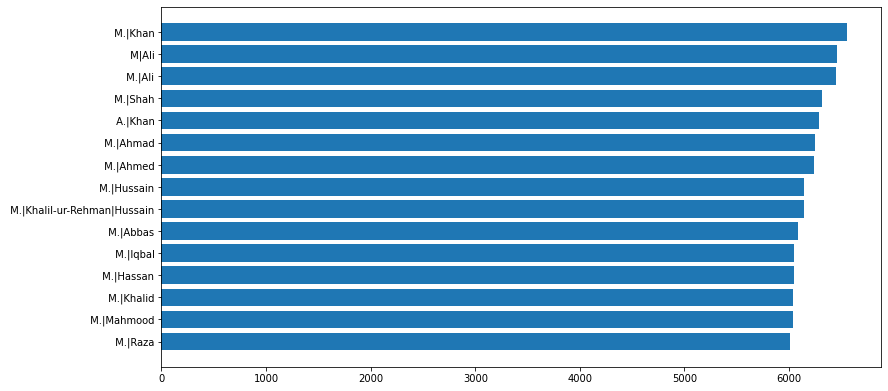

[' M.|Raza', ' M.|Mahmood', ' M.|Khalid', ' M.|Hassan', ' M.|Iqbal', ' M.|Abbas', ' M.|Khalil-ur-Rehman|Hussain', ' M.|Hussain', ' M.|Ahmed', ' M.|Ahmad', ' A.|Khan', ' M.|Shah', ' M.|Ali', ' M|Ali', ' M.|Khan']


In [11]:
c=0
author_names = []
author_papers_count = []
for x,y in sorted_authors.items():
  author_names.insert(0,x)
  author_papers_count.insert(0,y)
  c+=1
  if c==15:
    break

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(author_names,author_papers_count)
plt.show()
print(author_names)

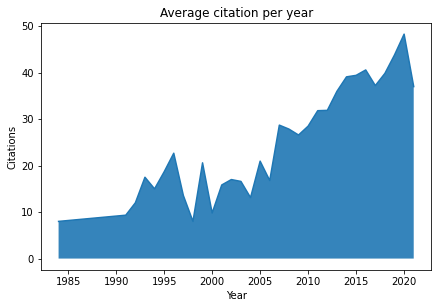

In [12]:
res = df.groupby('PY (Year Published)')['NR (Cited Reference Count)'].sum()
res1 = df.groupby('PY (Year Published)')
x = res.index
y = res.values/res1.size().values
plt.plot(x,y)
plt.tight_layout()
plt.fill_between(x,y,alpha=0.9)
plt.title("Average citation per year")
plt.xlabel("Year")
plt.ylabel("Citations")
plt.show()